In [1]:
using Images, FileIO, ImageTransformations, ImageEdgeDetection, TestImages
using ImageEdgeDetection: Percentile
using Base.Threads
using Statistics
using FTPClient, IJulia
using ImageMorphology
using Graphs
using Plots

In [2]:
Threads.nthreads()

1

In [3]:
# # specify the path to your local image file
# img_path = "./3.jpg"
# img = load(img_path)
# img_grey = Gray.(img)
# imresize(img, 256,256)
# alg = Canny(spatial_scale=5, high=Percentile(80), low=Percentile(20))
# img_edge = detect_edges(img, alg)
# mosaicview(img,img_grey,nrow = 1) #, img_edge

In [4]:
# mosaicview(nrow=1, Gray.(img), img, Gray.(channelview(img)[1,:,:]),Gray.(channelview(img)[2,:,:]),Gray.(channelview(img)[3,:,:]))

In [5]:
# cv = channelview(img)
# rc = float64.(cv[1,:,:])
# gc = float64.(cv[2,:,:])
# bc = float64.(cv[3,:,:])
# witr = mean(rc[1,:])
# witg = mean(gc[1,:])
# witb = mean(bc[1,:])
# witm = max(witr,witg,witb)
# rc *= witm/witr
# gc *= witm/witg
# bc *= witm/witb
# mc = min.(rc,bc,gc)
# witweg = RGB.(rc-mc,gc-mc,bc-mc)

In [6]:
# corners = imcorner(Gray.(witweg), Images.Percentile(99.5))
# img_copy = RGB.(witweg)
# img_copy[corners] .= RGB(1.0, 0.0, 0.0)
# img_copy

In [7]:
# #mosaicview(img_grey, clearborder(img_grey, 1, 1), nrow=1)
# size(img)
# #range(10)
# #borderindices = [ (x,y) for x=range(10), y=range(12)]
# border = Gray.(img)
# border[50:950, 50:950] .= 0
# bordercol = mean(border[border .> 0])

# bordercol
# stukje = img[:,:]
# stukje[bordercol*0.8 .<= Gray.(stukje) ] .=0
# stukje
# img
# #img[[1:11; end-10:end], :]
# #[collect(1:3); collect(6:8)]
# #[ (x,y) for (x,y)=(1:1):(3:3)]

In [8]:
# q = img

# canny(σ,h,l) = Canny(spatial_scale=σ, high=Percentile(h), low=Percentile(l))
# r1 = @spawn map(σ-> detect_edges(q, canny(σ,90,50)), 9:20)
# r2 = @spawn map(σ-> detect_edges(q, canny(σ,85,50)), 9:20)
# r3 = @spawn map(σ-> detect_edges(q, canny(σ,80,50)), 9:20)
# r4 = @spawn map(σ-> detect_edges(q, canny(σ,90,60)), 9:20)
# r5 = @spawn map(σ-> detect_edges(q, canny(σ,85,60)), 9:20)
# r6 = @spawn map(σ-> detect_edges(q, canny(σ,80,60)), 9:20)
# r1 = fetch(r1)
# r2 = fetch(r2)
# r3 = fetch(r3)
# r4 = fetch(r4)
# r5 = fetch(r5)
# r6 = fetch(r6)

In [9]:
# mosaicview( map(mosaicview, fill(q,size(r1)), r1,r2,r3,r4,r5,r6), nrow=1)

In [10]:
# border = detect_edges(q, canny(8,70,50))
# imgcopy = RGB.(img)
# imgcopy[Gray.(border) .> 0] = border[Gray.(border) .> 0]
# imgcopy

In [11]:
# mosaicview(
#     mosaicview(img_grey,img_grey,img_grey,img_grey,img_grey,img_grey),
#     mosaicview(r1),
#     #map(x-> fetch(@spawn mosaicview(x)), r1,r2,r3,r4,r5,r6)...;
#     nrow=1
# )


In [12]:
# img =  testimage("mandril_gray")
# # Detect edges at different scales by adjusting the `spatial_scale` parameter.
# img_edges₁ = detect_edges(img, Canny(spatial_scale = 1.4))
# img_edges₂ = detect_edges(img, Canny(spatial_scale = 2.8))
# img_edges₃ = detect_edges(img, Canny(spatial_scale = 5.6))
# demo₁ = mosaicview(img, img_edges₁, img_edges₂, img_edges₃; nrow = 2)

In [13]:
# # Control the hysteresis thresholds by specifying the low and high threshold values.
# img =  testimage("cameraman")
# img_edges₄ = detect_edges(img, Canny(spatial_scale = 1.4, low = Percentile(5), high = Percentile(80)))
# img_edges₅ = detect_edges(img, Canny(spatial_scale = 1.4, low = Percentile(60), high = Percentile(90)))
# img_edges₆ = detect_edges(img, Canny(spatial_scale = 1.4, low = Percentile(70), high = Percentile(95)))
# demo₂ = mosaicview(img, img_edges₄, img_edges₅, img_edges₆; nrow = 2)

In [14]:
function getNewestImage()
    ftp = FTP("ftp://pieter:ww@192.168.2.7:2211/DCIM/Camera")
    files = readdir(ftp)
    filename = last(filter(startswith("PXL_"), files))
    file = download(ftp,filename)
    close(ftp)
    img = load(file)
    return img
end

getNewestImage (generic function with 1 method)

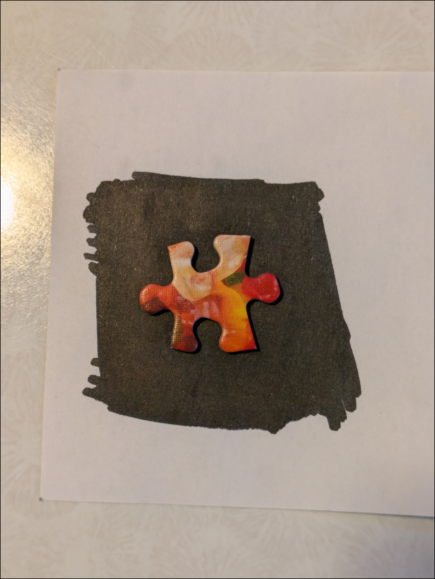

(4624, 3472)

In [15]:
#rawimg = getNewestImage()
rawimg = load("PXL_20241123_150705922.jpg")
display(rawimg)
size(rawimg)

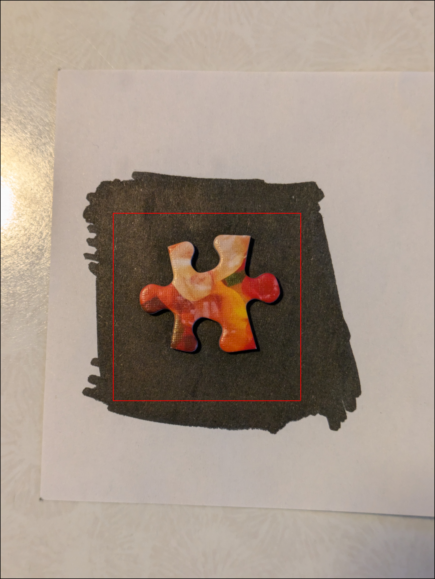

In [16]:
xleft = 900
ytop = 1700
width = 1500
height = 1500

xright = xleft + width
ybottom = ytop + height
borderthickness = 5
img = RGB.(rawimg)
img[ytop:ybottom, [xleft:(xleft+borderthickness); xright:(xright+borderthickness)]] .= RGB(1,0,0)
img[[ytop:(ytop+borderthickness); ybottom:(ybottom+borderthickness)], xleft:xright] .= RGB(1,0,0)
img

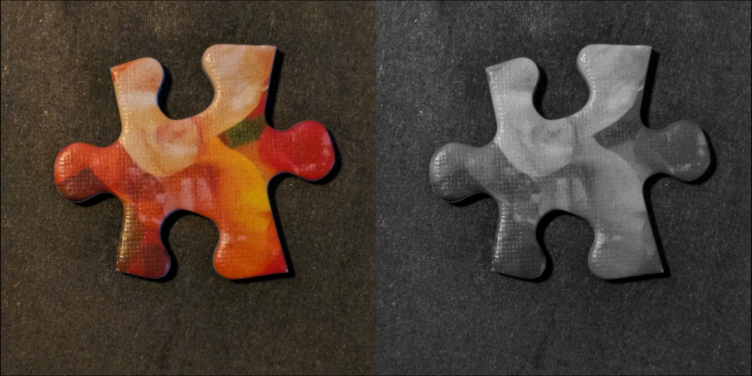

In [17]:
img = rawimg[ytop:ybottom, xleft:xright]
gray = Gray.(img)
mosaicview(img, gray, nrow=1)

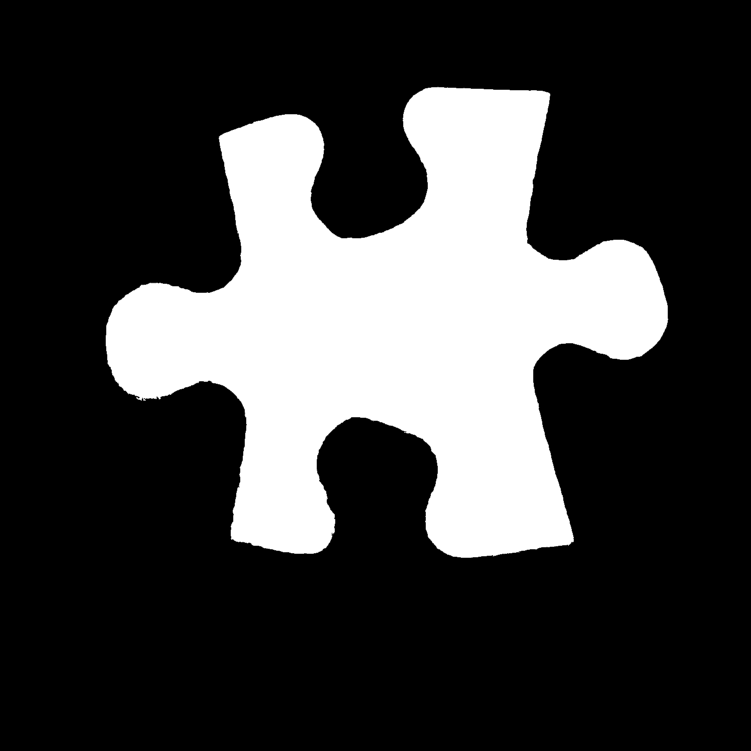

In [18]:
function getmask(img) 
    mask = zeros(size(img))

    hsv_img = HSV.(img)
    channels = channelview(float.(hsv_img))
    saturation = channels[2,:,:]
    value = channels[3,:,:]
    saturation[value .<0.1] .= 0

    mask[saturation+value*2 .- 0.5 .> 0.7] .= 1
    step1 = imfill(Bool.(mask), 0:1000)
    step2 = .!(step1)
    mask = .!(imfill(step2, 0:1000))
    return mask
end

mask = getmask(img)
Gray.(mask)
#Gray.(value+saturation*2 .-0.5)


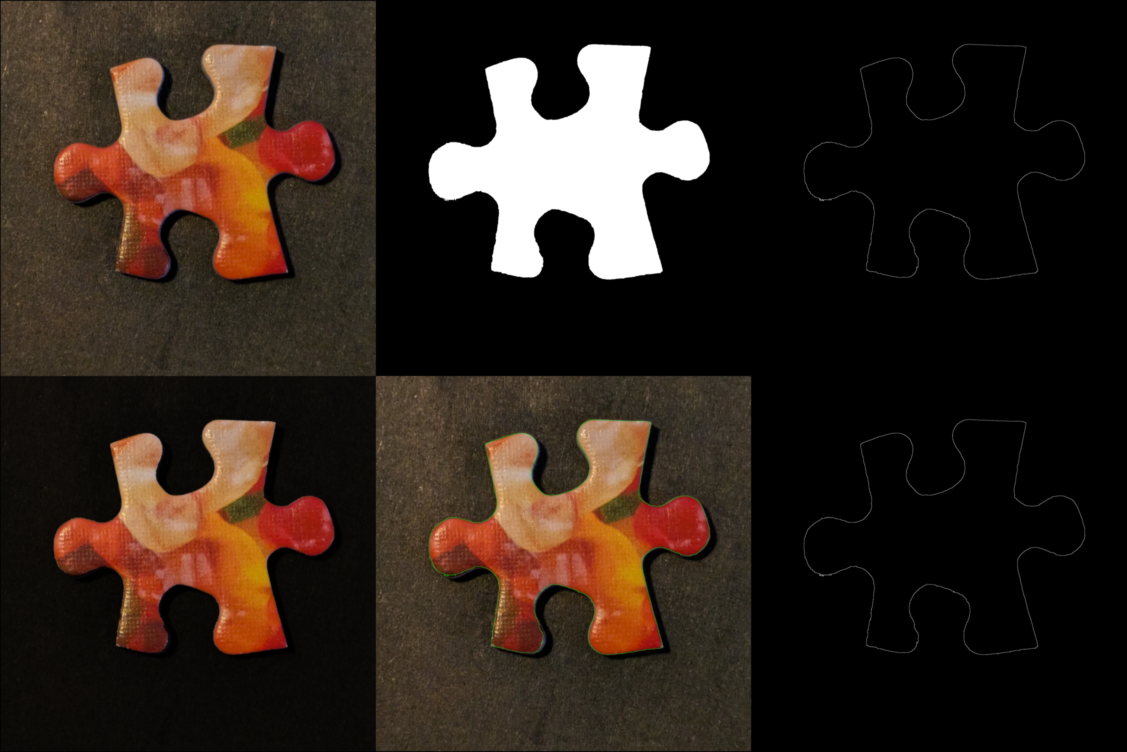

In [19]:
function makeborder(mask)
    return border = dilate(.!(mask)) .& mask
end

border = makeborder(mask)
#border = thinning(border)
imgcopy = RGB.(img)
imgcopy[border] .= RGB(0,1,0)
imgcopy
mosaicview(img, img .* (mask .* 0.8 .+ 0.2), Gray.(mask), imgcopy, Gray.(border), Gray.(border) .* mask, nrow=2)

Matrix{Float64}


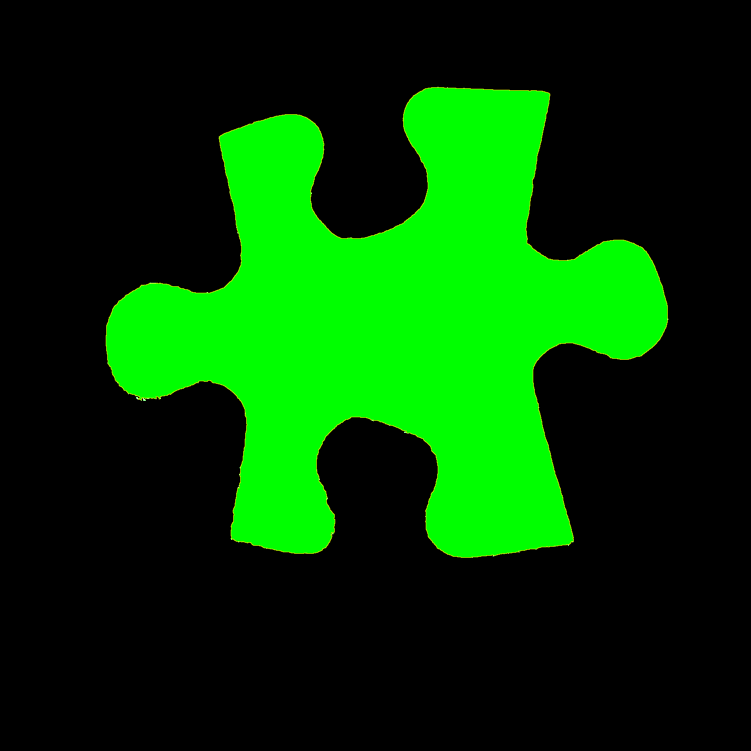

In [20]:


function toCartesian(img, index)
    width = size(img)[1]
    return CartesianIndex(mod(index-1, width)+1, div(index-1, width)+1)
end

function thinborder(border)
    edges = [ (p.first, qx ) 
                for p=pairs(border), diff=[CartesianIndex(0,1), CartesianIndex(1,0)] 
                for qx=[p.first + diff] 
                if p.second == 1 && border[qx] == 1]
    linearindices = LinearIndices(border)
    edgeslinind = map( tup -> Edge(linearindices[tup[1]], linearindices[tup[2]]), edges)

    g = SimpleGraphFromIterator(edgeslinind)
    v = first(filter( v -> degree(g,v) == 2, vertices(g)))
    n = neighbors(g,v)[1]
    rem_edge!(g,Edge(v,n))

    shortestpath = a_star(g, v, n)
    cycle = map(src, shortestpath)
    push!(cycle, n)

    cyclecoord = map(x -> toCartesian(border,x), cycle)
    bordernew = zeros(size(border))
    bordernew[cyclecoord] .= 1
    return (cyclecoord,bordernew)
end

function thinborderupdatemask(border, mask)
    (bordercoords, tborder) = thinborder(border)
    mask = mask .- (border .- tborder)
    println(typeof(mask))
    return (bordercoords, tborder, mask)
end

(bordercoords, tborder, tmask) = thinborderupdatemask(border, mask)
RGB.(border .- tborder) + tborder .* RGB(1,0,0) + mask .* RGB(0,1,0)
#Gray.(mask)




In [21]:
using ImageClipboard
#RGB.(RGB.(border .- tborder) + tborder .* RGB(1,0,0) + mask .* RGB(0,1,0))
clipboard_img(map(clamp01nan, RGB.(RGB.(border .- tborder) + tborder .* RGB(1,0,0) + mask .* RGB(0,1,0))))


GAC    Version        Location                                                                                         
---    -------        --------                                                                                         
True   v4.0.30319     C:\WINDOWS\Microsoft.Net\assembly\GAC_MSIL\System.Drawing\v4.0_4.0.0.0__b03f5f7f11d50a3a\Syste...




In [22]:
function getcorners(bordercoords, border, mask)
    tmpmask = copy(mask)
    kr = 5 # 30
    krm = 5 # 1
    @threads for c in bordercoords
        som = 0
        i = 0
        for dc = [ CartesianIndex(krm*dx,krm*dy) for dx=-kr:kr, dy=-kr:kr ]
            som += mask[c+dc]
            i += 1
        end
        avg = som/i
        tmpmask[c] = avg
    end

    bordercopy = copy(bordercoords)

    corners = Vector{CartesianIndex{2}}(undef, 4)
    for i in 1:4
        m = partialsort(bordercopy, by=(c -> Gray(tmpmask[c])), 1)
        corners[i] = m
        m = Tuple(m)
        filter!(c -> abs(Tuple(c)[1] - m[1]) + abs(Tuple(c)[2] - m[2]) > 150, bordercopy)
    end

    tl = argmin(c -> Tuple(c)[1] + Tuple(c)[2], corners)
    bl = argmin(c -> -Tuple(c)[1] + Tuple(c)[2], corners)
    tr = argmin(c -> Tuple(c)[1] - Tuple(c)[2], corners)
    br = argmin(c -> -Tuple(c)[1] - Tuple(c)[2], corners)

    return ((tl,bl,tr,br))
end


getcorners (generic function with 1 method)

(CartesianIndex(274, 439), CartesianIndex(1078, 464), CartesianIndex(188, 1100), CartesianIndex(1082, 1147))


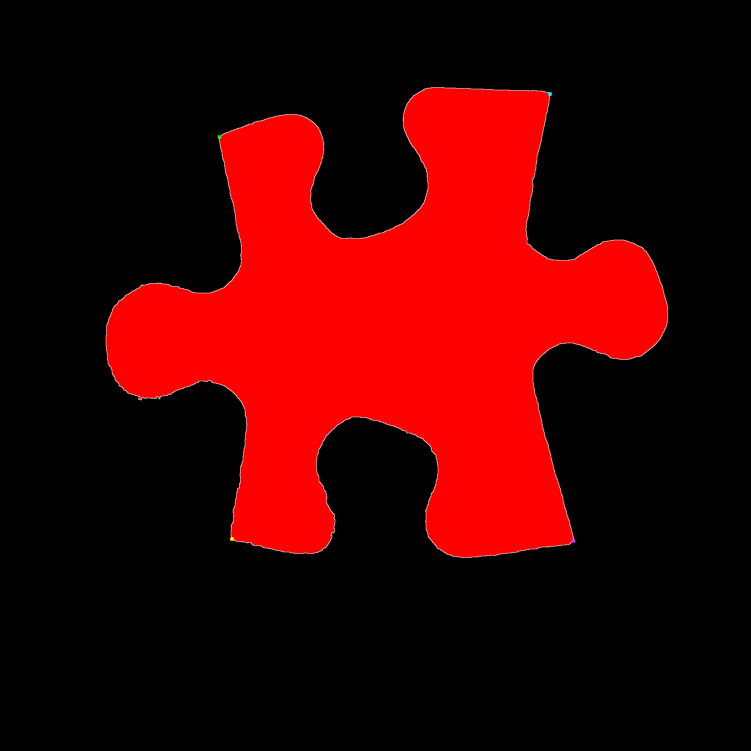

In [23]:
(tl,bl,tr,br) = getcorners(bordercoords, tborder, tmask)

# maximizers = partialsort(bordercoords, by=(c -> Gray(asdf[c])), 1:4)
# println(maximizers)
# println(Gray.(asdf[maximizers]))
println((tl,bl,tr,br))

tlblob = [ tl+CartesianIndex(x,y) for x=-3:3, y=-3:3]
blblob = [ bl+CartesianIndex(x,y) for x=-3:3, y=-3:3]
trblob = [ tr+CartesianIndex(x,y) for x=-3:3, y=-3:3]
brblob = [ br+CartesianIndex(x,y) for x=-3:3, y=-3:3]

asdf = tmask .* RGB(1,0,0)
asdf[bordercoords] .= RGB(1,1,1)

asdf[tlblob] .= RGB(0,1,0) # groen
asdf[blblob] .= RGB(1,1,0) # geel
asdf[trblob] .= RGB(0,1,1) # felblauw
asdf[brblob] .= RGB(0.8,0.2,1) # roze
asdf

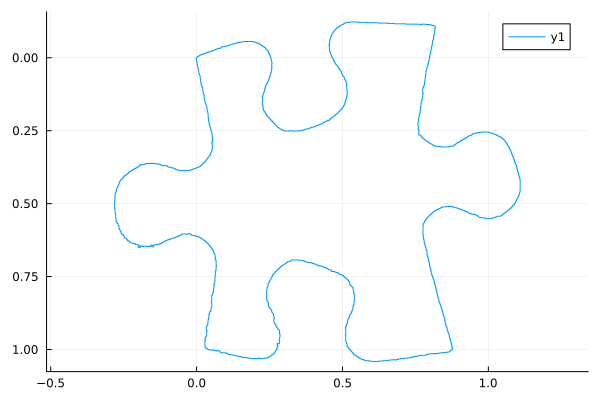

In [24]:
#display(plot(map( tup -> (tup[2], 1500-tup[1]), Tuple.(bordercoords)) , aspect_ratio=:equal))

#struct Point
#    x :: Float64
#    y :: Float64
#    color :: RGB{N0f8}
#end
#function pcoords(point :: Point) :: Tuple{Float64, Float64}
#    return (point.x, point.y)
#end
#function pcolor(point:: Point) :: RGB{N0f8}
#    return point.color
#end
## TODO KLEUREN 

function makenormalizedpoints((tl,bl,tr,br), bordercoords) #, img) :: Vector{Point}
    scale = maximum(Tuple(br - tl))
    function f(c)
        (y,x) = Tuple(c .- tl)
        return (x/scale, y/scale) #Point(x/scale, y/scale, img[c])
    end
    scaled = map(f, bordercoords)
    tln = f(tl)
    bln = f(bl)
    trn = f(tr)
    brn = f(br)
    return ((tln,bln,trn,brn), scaled)
end

((tln,bln,trn,brn), bordercoordsn) = makenormalizedpoints((tl,bl,tr,br), bordercoords)

plot(bordercoordsn, aspect_ratio=:equal, yflip=true)


((0.0, 0.0), (0.03094059405940594, 0.995049504950495), (0.818069306930693, -0.10643564356435643), (0.8762376237623762, 1.0))


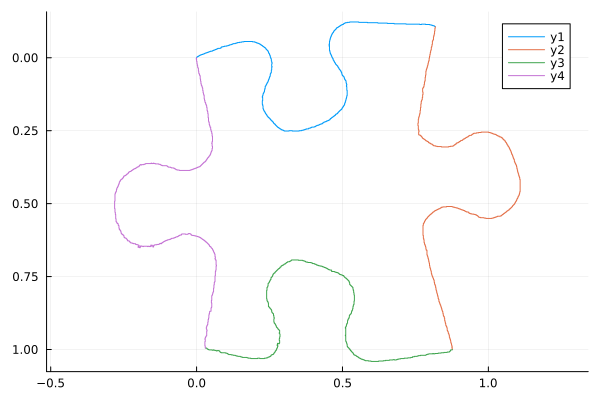

In [25]:
function getSegments((tl,bl,tr,br), bordercoords)
    corners = (tl,bl,tr,br)
    initspul = Iterators.takewhile( e -> !(e in corners), bordercoords)
    restspul = Iterators.dropwhile( e -> !(e in corners), bordercoords)
    bordercoords = Iterators.flatten((restspul, initspul))
    
    segs = Vector(undef, 4)
    for i in 1:4
        (head, tail) = Iterators.peel(bordercoords)
        segs[i] = Iterators.flatten(([head], Iterators.takewhile( e -> !(e in corners), tail)))
        bordercoords = Iterators.dropwhile( e -> !(e in corners), tail)
    end

    function tlfirst(segs)
        eerstedeel = collect(Iterators.takewhile(l -> first(l) != tl, segs))
        restdeel = collect(Iterators.dropwhile(l -> first(l) != tl, segs))
        return append!(restdeel, eerstedeel)
    end

    segs = tlfirst(segs)
    if first(segs[2]) != tr
        reverse!(segs)
        map(reverse!, segs)
        segs = tlfirst(segs)
    end

    segs = map(collect, segs)

    push!(segs[1], tr)
    push!(segs[2], br)
    push!(segs[3], bl)
    push!(segs[4], tl)

    return segs
end
println((tln,bln,trn,brn))
segments = getSegments((tln,bln,trn,brn), bordercoordsn)


plot(segments[1], aspect_ratio=:equal, yflip=true)
plot!(segments[2])
plot!(segments[3])
plot!(segments[4])

In [26]:
using Dierckx, Plots

struct Segment
    curve :: ParametricSpline
    kant :: Int
    corners :: Tuple{Tuple{Float64,Float64}, Tuple{Float64,Float64}}
    cornerspixel :: Tuple{CartesianIndex,CartesianIndex}
    # todo colors
end

struct Stukje
    randen :: Tuple{Segment, Segment, Segment, Segment}
end


In [27]:
function makeStukje(cornerspix,cornersnorm,segments)
    segs = Vector(undef, 4)
    kant = 1
    for (i,j) in [(1,3),(3,4),(4,2),(2,1)]
        corners = (cornersnorm[i], cornersnorm[j])
        println(corners)
        cornerspix = (cornerspix[i], cornerspix[j])

        seg = segments[kant]
        xyvals = stack((getindex.(seg,1), getindex.(seg,2)), dims=1)
        spline = ParametricSpline(xyvals; s=0.001) #s=0.0006

        segs[kant] = Segment(spline, kant, corners, cornerspix)

        kant += 1
    end

    stukje = Stukje(Tuple(segs))
    return stukje
end


x = makeStukje((tl,bl,tr,br),(tln,bln,trn,brn),segments)
print(x)


segment = segments[1]
xyvals = stack((getindex.(segment,1), getindex.(segment,2)), dims=1)
spline = ParametricSpline(xyvals; s=0.001) #s=0.0006


tvals = range(0.0, 1.0, 10000)
output = spline(tvals)
outputx = output[1, :]
outputy = output[2, :]
plot(segment)
plot!(outputx, outputy, aspect_ratio=:equal, yflip=true)



((0.0, 0.0), (0.818069306930693, -0.10643564356435643))
((0.818069306930693, -0.10643564356435643), (0.8762376237623762, 1.0))


LoadError: BoundsError: attempt to access Tuple{CartesianIndex{2}, CartesianIndex{2}} at index [3]

In [ ]:

#kopie = RGB.(tborder)
#zoomedin = @view kopie[(tr[1]-50):(tl[1]+250), (tl[2]-30):(tr[2]+30)]


#vals = collect(Iterators.takewhile( !=(tr), Iterators.dropwhile(!=(tl), bordercoords)))
#push!(vals, tr)
#kopie[[tl, tr]] .= RGB(0,1,0)
#kopie[vals] .= RGB(1,0,1)
#kopie[[tl, tr]] .= RGB(0,1,0)
#display(zoomedin)
##clipboard_img(zoomedin)

xvals = map(x -> float(x[2]), vals)
yvals = map(x -> float(x[1]), vals)
xyvals = [xvals yvals]'

numvals = length(vals)
tvals = map(x -> (x-1)/(numvals-1), 1:numvals)

spline = ParametricSpline(xyvals; s=500.0)

spline(0)

tvals = range(0.0, 1.0, 10000)
output = spline(tvals)
outputx = output[1, :]
outputy = 1500 .- output[2, :]
display( plot(outputx, outputy, aspect_ratio=:equal))#xlims=(0,1500), ylims=(0,1500)) 

#x = BSplineInterpolation(xvals, tvals, 3, :ArcLen, :Average)#, extrapolate=true)
#y = BSplineInterpolation(yvals, tvals, 3, :ArcLen, :Average)#, extrapolate=true)
#x = BSplineApprox(xvals, tvals, 3, Int(round(0.90*numvals)), :Uniform, :Uniform)#, extrapolate=true)
#y = BSplineApprox(yvals, tvals, 3, Int(round(0.90*numvals)), :Uniform, :Uniform)#, extrapolate=true)
#x = RegularizationSmooth(xvals, tvals, 2, λ = 100, alg=:fixed)
#y = RegularizationSmooth(yvals, tvals, 2, λ = 100, alg=:fixed)
#display(plot(spline))
#display(plot(y))

#tvals

typeof(spline)

In [ ]:
tvals = range(0.0, 1.0, 10000)
xvals = x(tvals)
yvals = y(tvals)
plot(xvals, yvals)

In [ ]:
clipboard_img(RGB.(asdf))

In [ ]:
# zoomedin = Gray.(@view tborder[400:800, 200:600])
# using DataInterpolations, Plots, RegularizationTools

# xvals = map(x -> float(x[2]), bordercoords)
# yvals = map(x -> float(x[1]), bordercoords)

# numvals = length(xvals)
# tvals = map(x -> (x-1)/(numvals-1), 1:numvals)


# #x = BSplineInterpolation(xvals, tvals, 3, :ArcLen, :Average)#, extrapolate=true)
# #y = BSplineInterpolation(yvals, tvals, 3, :ArcLen, :Average)#, extrapolate=true)
# #x = BSplineApprox(xvals, tvals, 3, Int(round(0.90*numvals)), :Uniform, :Uniform)#, extrapolate=true)
# #y = BSplineApprox(yvals, tvals, 3, Int(round(0.90*numvals)), :Uniform, :Uniform)#, extrapolate=true)
# x = RegularizationSmooth(xvals, tvals, 2, λ = 100, alg=:fixed)
# y = RegularizationSmooth(yvals, tvals, 2, λ = 100, alg=:fixed)
# display(plot(x))
# display(plot(y))
# #tvals